# Step 1: Data Preparation

## I. Data Preparation for sentdf & sentimentdf

In [15]:
import pandas as pd

sentdf = pd.read_csv('videoTitleSentiments_df_sent_structure.csv')
sentdf.head()

,videoId,sentence,sentiment,polarity,Sentiment_Type,title_structure,first_sent_tag,first_sent_tag_label
0,NXX338WY_Lw,PREVIEW: Attempting 200mph in the Jaguar XJ220...,0.50,0.500000,Positive,PROPN-PUNCT-VERB-NUM-NOUN-ADP-DET-PROPN-PROPN-...,PROPN,11
1,dtHcdU2c71Y,Which car will win Top Gear Speed Week 2020? (...,0.60,0.466667,Positive,DET-NOUN-VERB-VERB-PROPN-PROPN-PROPN-PROPN-NUM...,DET,5
2,vnrtWe-RAzg,Chris Harris on... the Ferrari SF90 Stradale |...,0.50,0.500000,Positive,PROPN-PROPN-ADP-PUNCT-DET-PROPN-PROPN-PROPN-PR...,PROPN,11
3,Ra1F0TsOCPs,Chris Harris vs 2020’s Best Performance Cars |...,0.75,0.400000,Positive,PROPN-PROPN-ADP-NUM-PART-PROPN-PROPN-PROPN-PRO...,PROPN,11
4,fXysipmTxcQ,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,0.50,0.500000,Positive,PROPN-PROPN-NOUN-NOUN-PUNCT-PROPN-PROPN-PROPN-...,PROPN,11


In [48]:
types = {}

for item in sentdf['first_sent_tag']:
    if item not in types.keys():
        types[item] = 1
    else:
        count = types[item]
        types[item]=count+1
        
print(len(types.keys()))
types

17


{'PROPN': 206152,
 'DET': 26680,
 'ADJ': 31698,
 'VERB': 28181,
 'NOUN': 50119,
 'NUM': 21027,
 'AUX': 2789,
 'PUNCT': 7998,
 'ADV': 13860,
 'ADP': 3880,
 'X': 1503,
 'PRON': 12021,
 'SYM': 734,
 'SCONJ': 902,
 'INTJ': 949,
 'PART': 127,
 'CCONJ': 70}

In [18]:
#rename sentiment col & adding 

import numpy as np

sentdf['titlePROPN']= np.where(sentdf['first_sent_tag']=='PROPN',1,0)
sentdf['titleDET'] = np.where(sentdf['first_sent_tag']=='DET',1,0)
sentdf['titleADJ'] = np.where(sentdf['first_sent_tag']=='ADJ',1,0)
sentdf['titleVERB'] = np.where(sentdf['first_sent_tag']=='VERB',1,0)
sentdf['titleNOUN'] = np.where(sentdf['first_sent_tag']=='NOUN',1,0)
sentdf['titleNUM'] = np.where(sentdf['first_sent_tag']=='NUM',1,0)
sentdf['titleAUX'] = np.where(sentdf['first_sent_tag']=='AUX',1,0)
sentdf['titlePUNCT'] = np.where(sentdf['first_sent_tag']=='PUNCT',1,0)
sentdf['titleADV'] = np.where(sentdf['first_sent_tag']=='ADV',1,0)
sentdf['titleADP'] = np.where(sentdf['first_sent_tag']=='ADP',1,0)
sentdf['titleX'] = np.where(sentdf['first_sent_tag']=='X',1,0)
sentdf['titlePRON'] = np.where(sentdf['first_sent_tag']=='PRON',1,0)
sentdf['titleSYM'] = np.where(sentdf['first_sent_tag']=='SYM',1,0)
sentdf['titleSCONJ'] = np.where(sentdf['first_sent_tag']=='SCONJ',1,0)
sentdf['titleINTJ'] = np.where(sentdf['first_sent_tag']=='INTJ',1,0)
sentdf['titlePART'] = np.where(sentdf['first_sent_tag']=='PART',1,0)
sentdf['titleCCONJ'] = np.where(sentdf['first_sent_tag']=='CCONJ',1,0)

sentdf = sentdf.drop(columns=['sentence','sentiment','polarity','Sentiment_Type','title_structure','first_sent_tag','first_sent_tag_label'])

sentdf.head()

,videoId,titlePROPN,titleDET,titleADJ,titleVERB,titleNOUN,titleNUM,titleAUX,titlePUNCT,titleADV,titleADP,titleX,titlePRON,titleSYM,titleSCONJ,titleINTJ,titlePART,titleCCONJ
0,NXX338WY_Lw,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,dtHcdU2c71Y,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,vnrtWe-RAzg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ra1F0TsOCPs,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,fXysipmTxcQ,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
sentimentdf = pd.read_csv('titleSentiments.csv')
sentimentdf

,videoId,videoTitle,sentence,sentiment,polarity,Sentiment_Type
0,NXX338WY_Lw,PREVIEW: Attempting 200mph in the Jaguar XJ220...,PREVIEW: Attempting 200mph in the Jaguar XJ220...,0.50,0.500000,Positive
1,dtHcdU2c71Y,Which car will win Top Gear Speed Week 2020? (...,Which car will win Top Gear Speed Week 2020? (...,0.60,0.466667,Positive
2,vnrtWe-RAzg,Chris Harris on... the Ferrari SF90 Stradale |...,Chris Harris on... the Ferrari SF90 Stradale |...,0.50,0.500000,Positive
3,Ra1F0TsOCPs,Chris Harris vs 2020’s Best Performance Cars |...,Chris Harris vs 2020’s Best Performance Cars |...,0.75,0.400000,Positive
4,fXysipmTxcQ,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,0.50,0.500000,Positive
...,...,...,...,...,...,...
407088,xkPA_4m6UG4,Farewell Video: Korean Middle School,Farewell Video: Korean Middle School,0.00,0.000000,Neutral
407089,RqXrFAZfjDE,My Favorite Korean BBQ in Korea,My Favorite Korean BBQ in Korea,0.50,1.000000,Positive
407090,VF5kAZ0Q_xs,My Farewell Speech to my Entire School (in Kor...,My Farewell Speech to my Entire School (in Kor...,0.00,0.625000,Neutral
407091,4fqo3iekT5I,"A Trip to the Outskirts of Yangon, Myanmar","A Trip to the Outskirts of Yangon, Myanmar",0.00,0.000000,Neutral


In [82]:
# counting titleLen

sentence = sentimentdf['videoTitle']
length = []

for s in sentence:
    slist = s.split(' ')
    length.append(len(slist))

sentimentdf['titleLen'] = length
sentimentdf.head()

,videoId,videoTitle,sentence,sentiment,polarity,Sentiment_Type,titleLen
0,NXX338WY_Lw,PREVIEW: Attempting 200mph in the Jaguar XJ220...,PREVIEW: Attempting 200mph in the Jaguar XJ220...,0.50,0.500000,Positive,12
1,dtHcdU2c71Y,Which car will win Top Gear Speed Week 2020? (...,Which car will win Top Gear Speed Week 2020? (...,0.60,0.466667,Positive,16
2,vnrtWe-RAzg,Chris Harris on... the Ferrari SF90 Stradale |...,Chris Harris on... the Ferrari SF90 Stradale |...,0.50,0.500000,Positive,10
3,Ra1F0TsOCPs,Chris Harris vs 2020’s Best Performance Cars |...,Chris Harris vs 2020’s Best Performance Cars |...,0.75,0.400000,Positive,13
4,fXysipmTxcQ,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,0.50,0.500000,Positive,12


In [83]:
dummy = pd.get_dummies(sentimentdf['Sentiment_Type'])
sentimentdf = pd.merge( left=sentimentdf, right=dummy, left_index=True, right_index=True)
sentimentdf = sentimentdf.drop(columns=['videoTitle','sentence','sentiment','polarity','Sentiment_Type'])
sentimentdf.head()

,videoId,titleLen,Negative,Neutral,Positive
0,NXX338WY_Lw,12,0,0,1
1,dtHcdU2c71Y,16,0,0,1
2,vnrtWe-RAzg,10,0,0,1
3,Ra1F0TsOCPs,13,0,0,1
4,fXysipmTxcQ,12,0,0,1


In [22]:
print(len(sentimentdf))
print(len(sentdf))

407093
408690


In [84]:
#inner join sentdf & sentimentdf
sent2df = pd.merge( left=sentimentdf, right=sentdf, on='videoId', how='inner')
sent2df.head()

,videoId,titleLen,Negative,Neutral,Positive,titlePROPN,titleDET,titleADJ,titleVERB,titleNOUN,...,titlePUNCT,titleADV,titleADP,titleX,titlePRON,titleSYM,titleSCONJ,titleINTJ,titlePART,titleCCONJ
0,NXX338WY_Lw,12,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,dtHcdU2c71Y,16,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vnrtWe-RAzg,10,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ra1F0TsOCPs,13,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,fXysipmTxcQ,12,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## II. Data Preparation for videodf

In [42]:
videodf = pd.read_csv('pooled_videos_df.csv')
dates = videodf['publishedAt']
videodf = videodf.drop(columns = ['description','publishedAt','thumbnails','videoTitle','commentCount','dislikeCount','likeCount'])
videodf.head()

,channelId,videoId,viewCount
0,UCjOl2AUblVmg2rA_cRgZkFg,NXX338WY_Lw,184447.0
1,UCjOl2AUblVmg2rA_cRgZkFg,dtHcdU2c71Y,217619.0
2,UCjOl2AUblVmg2rA_cRgZkFg,vnrtWe-RAzg,437777.0
3,UCjOl2AUblVmg2rA_cRgZkFg,Ra1F0TsOCPs,191070.0
4,UCjOl2AUblVmg2rA_cRgZkFg,fXysipmTxcQ,572569.0


In [43]:
from datetime import datetime
import calendar

day = []

for d in dates:
    d2 = datetime.strptime(d, '%Y-%m-%d %H:%M:%S')
    d3 = calendar.day_name[d2.weekday()]
    day.append(d3)
    
day

['Friday',
 'Friday',
 'Wednesday',
 'Tuesday',
 'Tuesday',
 'Friday',
 'Monday',
 'Monday',
 'Wednesday',
 'Tuesday',
 'Friday',
 'Thursday',
 'Monday',
 'Friday',
 'Monday',
 'Monday',
 'Monday',
 'Thursday',
 'Monday',
 'Wednesday',
 'Friday',
 'Thursday',
 'Sunday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Friday',
 'Thursday',
 'Thursday',
 'Monday',
 'Thursday',
 'Wednesday',
 'Friday',
 'Thursday',
 'Thursday',
 'Friday',
 'Friday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Tuesday',
 'Thursday',
 'Thursday',
 'Friday',
 'Friday',
 'Tuesday',
 'Friday',
 'Tuesday',
 'Thursday',
 'Tuesday',
 'Friday',
 'Tuesday',
 'Saturday',
 'Thursday',
 'Monday',
 'Monday',
 'Thursday',
 'Tuesday',
 'Monday',
 'Monday',
 'Tuesday',
 'Monday',
 'Friday',
 'Thursday',
 'Wednesday',
 'Wednesday',
 'Friday',
 'Friday',
 'Friday',
 'Thursday',
 'Thursday',
 'Sunday',
 'Friday',
 'Monday',
 'Friday',
 'Friday',
 'Monday',
 'Monday',
 'Monday',
 'Friday',
 'Monday',
 'Monday',
 'Sunday',
 'Friday',


In [44]:
dummy = pd.get_dummies(day)
videodf = pd.merge(videodf, dummy, left_index=True, right_index=True)
videodf.head()

,channelId,videoId,viewCount,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,UCjOl2AUblVmg2rA_cRgZkFg,NXX338WY_Lw,184447.0,1,0,0,0,0,0,0
1,UCjOl2AUblVmg2rA_cRgZkFg,dtHcdU2c71Y,217619.0,1,0,0,0,0,0,0
2,UCjOl2AUblVmg2rA_cRgZkFg,vnrtWe-RAzg,437777.0,0,0,0,0,0,0,1
3,UCjOl2AUblVmg2rA_cRgZkFg,Ra1F0TsOCPs,191070.0,0,0,0,0,0,1,0
4,UCjOl2AUblVmg2rA_cRgZkFg,fXysipmTxcQ,572569.0,0,0,0,0,0,1,0


In [69]:
def getTime(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Afternoon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

videodf['hours'] = list(map(lambda x: int(x[11:13]), dates))
videodf['times'] = videodf['hours'].apply(getTime)

dummy = pd.get_dummies(videodf['times'])
videodf = pd.merge(videodf, dummy, left_index=True, right_index=True)
videodf = videodf.drop(columns = ['hours','times'])
videodf.head()

,channelId,videoId,viewCount,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Afternoon,Early Morning,Evening,Late Night,Morning,Night
0,UCjOl2AUblVmg2rA_cRgZkFg,NXX338WY_Lw,184447.0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,UCjOl2AUblVmg2rA_cRgZkFg,dtHcdU2c71Y,217619.0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,UCjOl2AUblVmg2rA_cRgZkFg,vnrtWe-RAzg,437777.0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,UCjOl2AUblVmg2rA_cRgZkFg,Ra1F0TsOCPs,191070.0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,UCjOl2AUblVmg2rA_cRgZkFg,fXysipmTxcQ,572569.0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [70]:
def getSeason(x):
    if (x > 2) and (x <= 5):
        return 'Spring'
    elif (x > 5) and (x <= 8 ):
        return 'Summer'
    elif (x > 8) and (x <= 11):
        return'Autumn'
    elif (x == 12) or (x<=2):
        return'Winter'
    
videodf['month'] = list(map(lambda x: int(x[5:7]), dates))
videodf['season'] = videodf['month'].apply(getSeason)
dummy = pd.get_dummies(videodf['season'])
videodf = pd.merge(videodf, dummy, left_index=True, right_index=True)
videodf = videodf.drop(columns = ['month','season'])
videodf.head()

,channelId,videoId,viewCount,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Afternoon,Early Morning,Evening,Late Night,Morning,Night,Autumn,Spring,Summer,Winter
0,UCjOl2AUblVmg2rA_cRgZkFg,NXX338WY_Lw,184447.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,UCjOl2AUblVmg2rA_cRgZkFg,dtHcdU2c71Y,217619.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,UCjOl2AUblVmg2rA_cRgZkFg,vnrtWe-RAzg,437777.0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
3,UCjOl2AUblVmg2rA_cRgZkFg,Ra1F0TsOCPs,191070.0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
4,UCjOl2AUblVmg2rA_cRgZkFg,fXysipmTxcQ,572569.0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


## III. Joining sent2df, videodf, channeldf & objectsdf

In [91]:
#inner join sent2df & videodf
featuresdf = pd.merge(left=videodf, right=sent2df, on='videoId', how='inner')
featuresdf.head()

,channelId,videoId,viewCount,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,titlePUNCT,titleADV,titleADP,titleX,titlePRON,titleSYM,titleSCONJ,titleINTJ,titlePART,titleCCONJ
0,UCjOl2AUblVmg2rA_cRgZkFg,NXX338WY_Lw,184447.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,UCjOl2AUblVmg2rA_cRgZkFg,dtHcdU2c71Y,217619.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,UCjOl2AUblVmg2rA_cRgZkFg,vnrtWe-RAzg,437777.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,UCjOl2AUblVmg2rA_cRgZkFg,Ra1F0TsOCPs,191070.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,UCjOl2AUblVmg2rA_cRgZkFg,fXysipmTxcQ,572569.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#import channeldf

channeldf = pd.read_csv('channel_df.csv')
channeldf.head()

,channelId,description,publishedAt,region,subscriberCount,videoCount,viewCount
0,UC07-dOwgza1IguKA86jqxNA,The official public health information Youtube...,2005-10-25T13:14:08Z,US,626000,1664,57909283
1,UCh4pyZUB0mNzieaKv831flA,We imagine a world where everyone has a place ...,2008-11-26T07:24:00Z,US,696000,1060,156537119
2,UCc4yillQaNo6a-iG2PYbbrA,Hey everyone! Welcome to my channel. Here you ...,2007-01-03T22:52:37Z,US,709000,191,79229538
3,UCB7BryuXaMe1pUMznYAq4Jg,"My channel has one simple goal, to motivate yo...",2013-10-24T14:56:37Z,US,770000,57,99831679
4,UCBP4B896svWOcWdRp8UjH2Q,Jace Norman / Xander Norman // filmmakers / en...,2012-01-02T04:40:17Z,US,880000,28,30837600


In [87]:
# finding avgViewCount

channeldf['avgViewCount'] = round(channeldf['viewCount']/channeldf['videoCount'])
channeldf = channeldf.drop(columns=['description','publishedAt','region','viewCount','videoCount'])
channeldf.head()

,channelId,subscriberCount,avgViewCount
0,UC07-dOwgza1IguKA86jqxNA,626000,34801.0
1,UCh4pyZUB0mNzieaKv831flA,696000,147677.0
2,UCc4yillQaNo6a-iG2PYbbrA,709000,414814.0
3,UCB7BryuXaMe1pUMznYAq4Jg,770000,1751433.0
4,UCBP4B896svWOcWdRp8UjH2Q,880000,1101343.0


In [92]:
#inner join featuresdf & channeldf

featuresdf = pd.merge(left=featuresdf, right=channeldf, on='channelId', how='left')
featuresdf.head()

,channelId,videoId,viewCount,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,titleADP,titleX,titlePRON,titleSYM,titleSCONJ,titleINTJ,titlePART,titleCCONJ,subscriberCount,avgViewCount
0,UCjOl2AUblVmg2rA_cRgZkFg,NXX338WY_Lw,184447.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7610000,2224636.0
1,UCjOl2AUblVmg2rA_cRgZkFg,dtHcdU2c71Y,217619.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7610000,2224636.0
2,UCjOl2AUblVmg2rA_cRgZkFg,vnrtWe-RAzg,437777.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7610000,2224636.0
3,UCjOl2AUblVmg2rA_cRgZkFg,Ra1F0TsOCPs,191070.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,7610000,2224636.0
4,UCjOl2AUblVmg2rA_cRgZkFg,fXysipmTxcQ,572569.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,7610000,2224636.0


In [ ]:
#import objectsdf

objectsdf = pd.read_csv('object_detection_df.csv')
objectsdf.head()

#inner join featuresdf & channeldf

featuresdf = pd.merge(left=featuresdf, right=objectsdf, on='videoId', how='left')
featuresdf.head()

In [103]:
featuresdf.to_csv('features_df.csv', index=False, header=True)

In [127]:
print(featuresdf.shape)
print(featuresdf.columns)

(407093, 43)
Index(['channelId', 'videoId', 'viewCount', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon',
       'Early Morning', 'Evening', 'Late Night', 'Morning', 'Night', 'Autumn',
       'Spring', 'Summer', 'Winter', 'titleLen', 'Negative', 'Neutral',
       'Positive', 'titlePROPN', 'titleDET', 'titleADJ', 'titleVERB',
       'titleNOUN', 'titleNUM', 'titleAUX', 'titlePUNCT', 'titleADV',
       'titleADP', 'titleX', 'titlePRON', 'titleSYM', 'titleSCONJ',
       'titleINTJ', 'titlePART', 'titleCCONJ', 'subscriberCount',
       'avgViewCount'],
      dtype='object')


# Step 2: Feature Selection

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [105]:
featuresdf = pd.read_csv('features_df.csv')
featuresdf.head()

,channelId,videoId,viewCount,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,titleADP,titleX,titlePRON,titleSYM,titleSCONJ,titleINTJ,titlePART,titleCCONJ,subscriberCount,avgViewCount
0,UCjOl2AUblVmg2rA_cRgZkFg,NXX338WY_Lw,184447.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7610000,2224636.0
1,UCjOl2AUblVmg2rA_cRgZkFg,dtHcdU2c71Y,217619.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7610000,2224636.0
2,UCjOl2AUblVmg2rA_cRgZkFg,vnrtWe-RAzg,437777.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7610000,2224636.0
3,UCjOl2AUblVmg2rA_cRgZkFg,Ra1F0TsOCPs,191070.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,7610000,2224636.0
4,UCjOl2AUblVmg2rA_cRgZkFg,fXysipmTxcQ,572569.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,7610000,2224636.0


In [272]:
print(list(featuresdf.columns)[3:])

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon', 'Early Morning', 'Evening', 'Late Night', 'Morning', 'Night', 'Autumn', 'Spring', 'Summer', 'Winter', 'titleLen', 'Negative', 'Neutral', 'Positive', 'titlePROPN', 'titleDET', 'titleADJ', 'titleVERB', 'titleNOUN', 'titleNUM', 'titleAUX', 'titlePUNCT', 'titleADV', 'titleADP', 'titleX', 'titlePRON', 'titleSYM', 'titleSCONJ', 'titleINTJ', 'titlePART', 'titleCCONJ', 'subscriberCount', 'avgViewCount']


In [275]:
l = ['videoTitle', 'sentimentType', 'first_sent_tag','publishedAt','thumbnails','subscriberCount','videoCount','viewCount']
print(l)


['videoTitle', 'sentimentType', 'first_sent_tag', 'publishedAt', 'thumbnails', 'subscriberCount', 'videoCount', 'viewCount']


## Model 1: ANOVA test for categorical input variables

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that some features stand out as perhaps being more relevant than others, with much larger test statistic values.

In [242]:
catdf = featuresdf.drop(columns=['titleLen','subscriberCount','avgViewCount'])
print(catdf.shape)
print(catdf.columns)
rows = len(catdf)

(407093, 40)
Index(['channelId', 'videoId', 'viewCount', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon',
       'Early Morning', 'Evening', 'Late Night', 'Morning', 'Night', 'Autumn',
       'Spring', 'Summer', 'Winter', 'Negative', 'Neutral', 'Positive',
       'titlePROPN', 'titleDET', 'titleADJ', 'titleVERB', 'titleNOUN',
       'titleNUM', 'titleAUX', 'titlePUNCT', 'titleADV', 'titleADP', 'titleX',
       'titlePRON', 'titleSYM', 'titleSCONJ', 'titleINTJ', 'titlePART',
       'titleCCONJ'],
      dtype='object')


In [261]:
# Split into input(x) and output(y)

#retrieve numpy array & split
dataset= catdf.values
X = dataset[:,3:]
y = dataset[:,2]

#format all fields as string
X = X.astype(str)
y=y.astype('int64')
y=y.reshape((rows,1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3350, 37) (3350, 1)
Test (1650, 37) (1650, 1)


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**k

Feature 0: 0.582440
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.280357
Feature 4: 0.000000
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.034524
Feature 9: 0.328274
Feature 10: 0.000000
Feature 11: 0.838690
Feature 12: 0.000000
Feature 13: 0.000000
Feature 14: 0.000000
Feature 15: 0.647024
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.251190
Feature 19: 0.182440
Feature 20: 0.897024
Feature 21: 0.000000
Feature 22: 0.192857
Feature 23: 0.255357
Feature 24: 0.000000
Feature 25: 0.365774
Feature 26: 0.000000
Feature 27: 0.000000
Feature 28: 0.000000
Feature 29: 0.000000
Feature 30: 0.000000
Feature 31: 0.000000
Feature 32: 0.000000
Feature 33: 0.099107
Feature 34: 0.000000
Feature 35: 0.000000
Feature 36: 0.000000


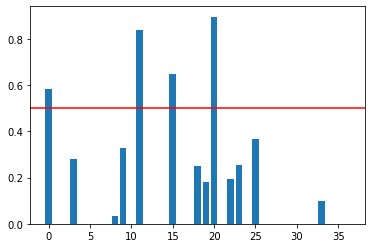

In [268]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.axhline(y=0.5, color='r', linestyle='-')
pyplot.show()

In [263]:
index = []

for i in range(len(list(fs.scores_))):
    score = list(fs.scores_)[i]
    if score>0.5:
        print(str(i) + ": " + catdf.columns[i])

15: Night
20: Negative
26: titleVERB


## Model 2: Pearson's Correlation test for numerical input variables
https://medium.com/analytics-vidhya/feature-selection-techniques-2614b3b7efcd

remove variables that are correlated to each other

In [137]:
numdf = featuresdf.loc[:,['viewCount','titleLen','subscriberCount','avgViewCount']]
print(numdf.shape)
print(numdf.columns)

(407093, 4)
Index(['viewCount', 'titleLen', 'subscriberCount', 'avgViewCount'], dtype='object')


In [138]:
cor = numdf.corr()
cor

,viewCount,titleLen,subscriberCount,avgViewCount
viewCount,1.000000,0.000281,0.091085,0.337468
titleLen,0.000281,1.000000,0.065892,0.022933
subscriberCount,0.091085,0.065892,1.000000,0.254655
avgViewCount,0.337468,0.022933,0.254655,1.000000


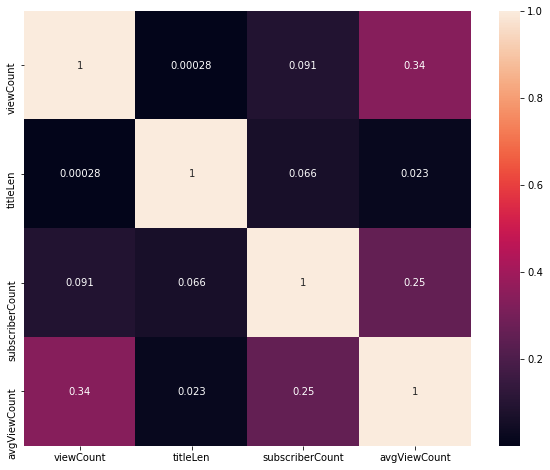

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)
plt.savefig('heatmap.png')
plt.show()

In [145]:
threshold = 0.5
a = abs(cor['viewCount'])
result=a[a>threshold]
result

viewCount    1.0
Name: viewCount, dtype: float64

## Model 3: ANOVA test for ALL input variables

In [252]:
alldf = featuresdf
print(alldf.shape)
print(alldf.columns)
rows = len(alldf)

(5000, 43)
Index(['channelId', 'videoId', 'viewCount', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon',
       'Early Morning', 'Evening', 'Late Night', 'Morning', 'Night', 'Autumn',
       'Spring', 'Summer', 'Winter', 'titleLen', 'Negative', 'Neutral',
       'Positive', 'titlePROPN', 'titleDET', 'titleADJ', 'titleVERB',
       'titleNOUN', 'titleNUM', 'titleAUX', 'titlePUNCT', 'titleADV',
       'titleADP', 'titleX', 'titlePRON', 'titleSYM', 'titleSCONJ',
       'titleINTJ', 'titlePART', 'titleCCONJ', 'subscriberCount',
       'avgViewCount'],
      dtype='object')


In [253]:
# Split into input(x) and output(y)

#retrieve numpy array & split
dataset= alldf.values
X = dataset[:,3:]
y = dataset[:,2]

#format all fields as string
X = X.astype(str)
y=y.astype('int64')
y=y.reshape((rows,1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3350, 40) (3350, 1)
Test (1650, 40) (1650, 1)


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**k

Feature 0: 0.251190
Feature 1: 0.000000
Feature 2: 0.359524
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.238690
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.142857
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.661607
Feature 14: 0.000000
Feature 15: 0.486607
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.000000
Feature 19: 0.280357
Feature 20: 0.199107
Feature 21: 0.451190
Feature 22: 0.000000
Feature 23: 0.178274
Feature 24: 0.000000
Feature 25: 0.000000
Feature 26: 0.000000
Feature 27: 0.000000
Feature 28: 0.542857
Feature 29: 0.036607
Feature 30: 0.000000
Feature 31: 0.626190
Feature 32: 0.000000
Feature 33: 0.000000
Feature 34: 0.394940
Feature 35: 0.000000
Feature 36: 0.194940
Feature 37: 0.083333
Feature 38: 0.000000
Feature 39: 0.147024


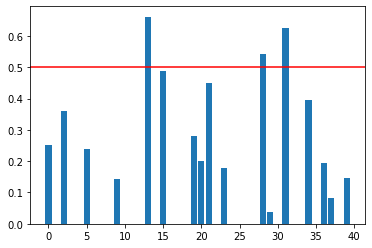

In [259]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.axhline(y=0.5, color='r', linestyle='-')
pyplot.show()

In [256]:
index = []

for i in range(len(list(fs.scores_))):
    score = list(fs.scores_)[i]
    if score>0.5:
        print(str(i) + ": " + alldf.columns[i])

0: channelId
10: Afternoon
15: Night
19: Winter
20: titleLen
25: titleDET
32: titleADV
